In [2]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import math
import scipy.stats
import IPython.display as ipd
import matplotlib.pyplot as plt

In [142]:
file_dir = "../resources/piano_c.wav"

In [143]:
ipd.Audio(file_dir)

In [144]:
violin_c4, sr = librosa.load(file_dir)
#y_30, sr_30 = librosa.load(file_dir, duration = 30)
#y_full, sr_full = librosa.load(file_dir,sr = 1000)

In [145]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=1):
    X = np.fft.fft(signal)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

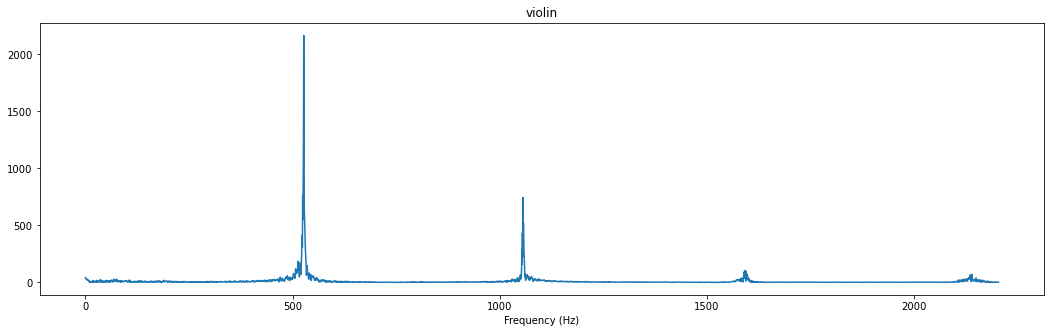

In [146]:
plot_magnitude_spectrum(violin_c4, sr, "violin", 0.1)

# TEMPO

C:\Users\urgpa\anaconda3\lib\site-packages\librosa\filters.py:238: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  warnings.warn(
<ipython-input-124-92129c5c0921>:21: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],


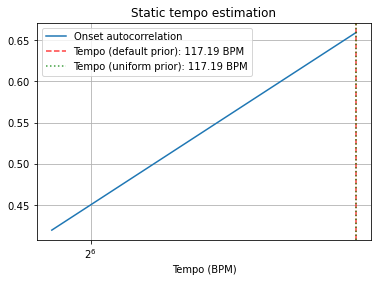

In [124]:
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo

prior = scipy.stats.uniform(30, 300)  # uniform over 30-300 BPM
utempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, prior=prior)

dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,
                            aggregate=None)

# Convert to scalar
tempo = tempo.item()
utempo = utempo.item()
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,
                                  hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
fig, ax = plt.subplots()
ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],
             label='Onset autocorrelation', basex=2)
ax.axvline(tempo, 0, 1, alpha=0.75, linestyle='--', color='r',
            label='Tempo (default prior): {:.2f} BPM'.format(tempo))
ax.axvline(utempo, 0, 1, alpha=0.75, linestyle=':', color='g',
            label='Tempo (uniform prior): {:.2f} BPM'.format(utempo))
ax.set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax.grid(True)
ax.legend()

# SELECT VIRTUAL COMPAS TIME

In [125]:
beat_num = 2
bpm = tempo
srate = 1000

In [126]:
song_duration= librosa.get_duration(y=y_full, sr=sr_full)

vcompas_time = beat_num * 60 / bpm
vcompas_num  = song_duration / vcompas_time

compas_sample_num = vcompas_time * srate
song_sample_num = compas_sample_num * vcompas_num

In [127]:
len(y_full)

200307

In [128]:
y_full[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# LOOP THROGH SONG VIRTUAL COMPASES

In [129]:
vcompas_data = {}
for vcompas_i in range(0,math.floor(vcompas_num)): 
    start = math.floor(compas_sample_num * vcompas_i)
    end = math.floor(compas_sample_num * (vcompas_i + 1))
    selected_samples = y_full[start:end]
    #y, sr = librosa.load(file_dir,offset = start, duration = end, sr = 22050)
    vcompas_data[vcompas_i] = ([selected_samples],vcompas_time * vcompas_i)
    print(len(selected_samples))

1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024
1024


In [130]:
df = pd.DataFrame.from_dict(vcompas_data, orient = 'index', columns = ['wform','times'])

In [131]:
df.head(11)

,wform,times
0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.000
1,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",1.024
2,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",2.048
3,"[[0.0025657073, 0.0021205156, -0.0015314094, 0...",3.072
4,"[[0.15721531, 0.1659551, 0.08280434, 0.0060366...",4.096
5,"[[0.12791917, 0.002463396, -0.023207227, -0.04...",5.120
6,"[[0.01583159, -0.010111427, 0.0076634777, 0.00...",6.144
7,"[[0.14184836, 0.19862267, -0.0015167514, -0.14...",7.168
8,"[[0.0027381743, -0.048294045, 0.027535599, 0.0...",8.192
9,"[[0.0021331888, 0.0047462857, 0.010426238, 0.0...",9.216


# WAVEFORMS

In [139]:
def plot_magnitude_spectrum(signal, sr, title, f_ratio=0.5):
    y_harm, y_perc = librosa.effects.hpss(signal)

    X = np.fft.fft(y_harm)
    X_mag = np.absolute(X)
    
    plt.figure(figsize=(18, 5))
    
    f = np.linspace(0, sr, len(X_mag))
    f_bins = int(len(X_mag)*f_ratio)  
    
    plt.plot(f[:f_bins], X_mag[:f_bins])
    plt.xlabel('Frequency (Hz)')
    plt.title(title)

C:\Users\urgpa\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1024
  warnings.warn(


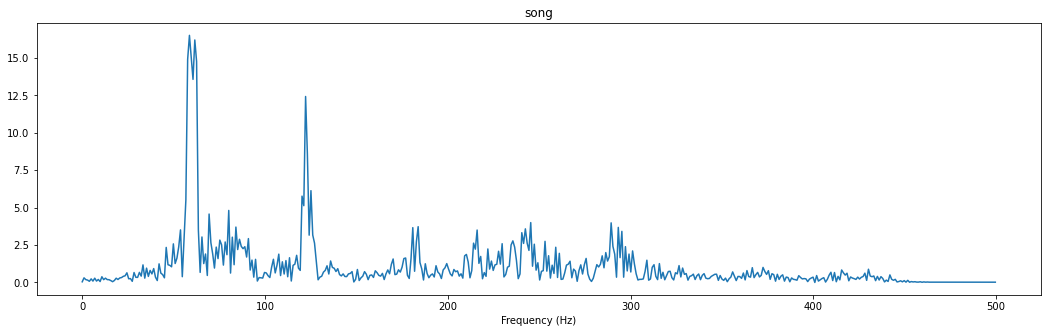

In [140]:
plot_magnitude_spectrum(df.wform[50][0], sr, 'song', 0.5)

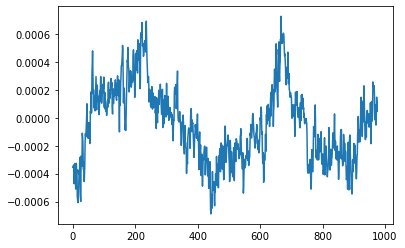

In [90]:
normalized_tone = np.int16((df.wform[10][0] / df.wform[10][0].max()) * 32767)

plt.plot(df.wform[12][0])
plt.show()

In [ ]:
normalized_tone = np.int16((mixed_tone / mixed_tone.max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

In [28]:
_, nice_tone = generate_sine_wave(400, SAMPLE_RATE, DURATION)
_, noise_tone = generate_sine_wave(4000, SAMPLE_RATE, DURATION)
noise_tone = noise_tone * 0.3

mixed_tone = nice_tone + noise_tone

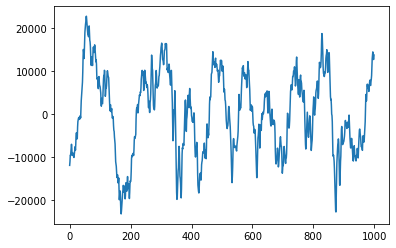

In [38]:
normalized_tone = np.int16((df.wform[10][0] / df.wform[10][0].max()) * 32767)

plt.plot(normalized_tone[:1000])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (22050,) and (43008,)

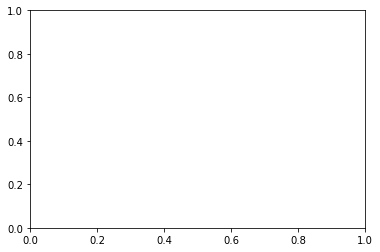

In [39]:
from scipy.fft import fft, fftfreq

# Number of samples in normalized_tone
N = SAMPLE_RATE * DURATION

yf = fft(normalized_tone)
xf = fftfreq(N, 1 / SAMPLE_RATE)

plt.plot(xf, np.abs(yf))
plt.show()

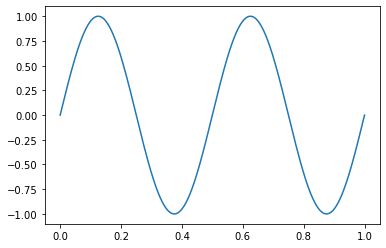

In [36]:
import numpy as np
from matplotlib import pyplot as plt

SAMPLE_RATE = 22050  # Hertz
DURATION = int(vcompas_time)# Seconds

def generate_sine_wave(freq, sample_rate, duration):
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    return x, y

# Generate a 2 hertz sine wave that lasts for 5 seconds
x, y = generate_sine_wave(2, SAMPLE_RATE, DURATION)
plt.plot(x, y)
plt.show()

[Text(0.5, 1.0, 'Harmonic + Percussive')]

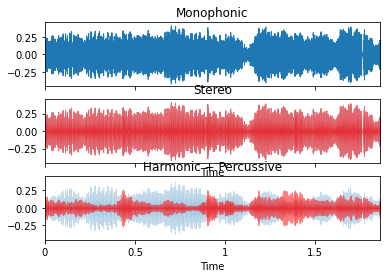

In [25]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

librosa.display.waveplot(df.wform[10][0], sr=sr, ax=ax[0])
ax[0].set(title='Monophonic')
ax[0].label_outer()

librosa.display.waveplot(df.wform[10][0], sr=sr, alpha=0.25, ax=ax[1])
librosa.display.waveplot(df.wform[10][0], sr=sr, color='r', alpha=0.5, ax=ax[1])
ax[1].set(title='Stereo')

y_harm, y_perc = librosa.effects.hpss(df.wform[10][0])
librosa.display.waveplot(y_harm, sr=sr, alpha=0.25, ax=ax[2])
librosa.display.waveplot(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2])
ax[2].set(title='Harmonic + Percussive')

In [26]:
y, sr = librosa.load(file_dir, duration=5)
S = np.abs(librosa.stft(y))
comps, acts = librosa.decompose.decompose(S, n_components=8)

C:\Users\urgpa\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\urgpa\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linthreshy' parameter of __init__() has been renamed 'linthresh' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)
C:\Users\urgpa\anaconda3\lib\site-packages\librosa\display.py:974: MatplotlibDeprecationWarning: The 'linscaley' parameter of __init__() has been renamed 'linscale' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  scaler(mode, **kwargs)


[Text(0, 0.5, 'Components'), Text(0.5, 1.0, 'Activations')]

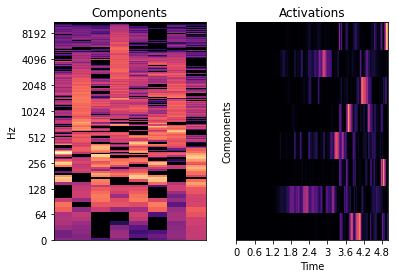

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2)
librosa.display.specshow(librosa.amplitude_to_db(comps,
                                                 ref=np.max),
                         y_axis='log', ax=ax[0])
ax[0].set(title='Components')
librosa.display.specshow(acts, x_axis='time', ax=ax[1])
ax[1].set(ylabel='Components', title='Activations')

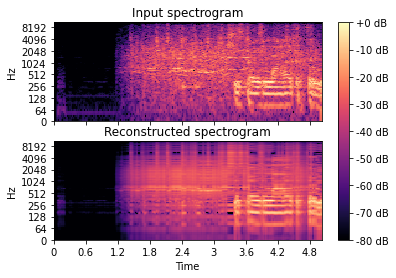

In [28]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
ax[0].set(title='Input spectrogram')
ax[0].label_outer()
S_approx = comps.dot(acts)
img = librosa.display.specshow(librosa.amplitude_to_db(S_approx,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Reconstructed spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")

<ipython-input-122-e76337b963de>:22: MatplotlibDeprecationWarning: The 'basex' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],


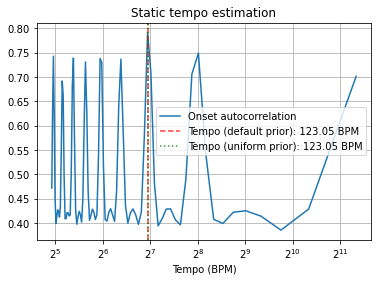

In [122]:
y, sr = librosa.load(file_dir)
onset_env = librosa.onset.onset_strength(y, sr=sr)
tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)
tempo

prior = scipy.stats.uniform(30, 300)  # uniform over 30-300 BPM
utempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr, prior=prior)

dtempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr,
                            aggregate=None)

# Convert to scalar
tempo = tempo.item()
utempo = utempo.item()
# Compute 2-second windowed autocorrelation
hop_length = 512
ac = librosa.autocorrelate(onset_env, 2 * sr // hop_length)
freqs = librosa.tempo_frequencies(len(ac), sr=sr,
                                  hop_length=hop_length)
# Plot on a BPM axis.  We skip the first (0-lag) bin.
fig, ax = plt.subplots()
ax.semilogx(freqs[1:], librosa.util.normalize(ac)[1:],
             label='Onset autocorrelation', basex=2)
ax.axvline(tempo, 0, 1, alpha=0.75, linestyle='--', color='r',
            label='Tempo (default prior): {:.2f} BPM'.format(tempo))
ax.axvline(utempo, 0, 1, alpha=0.75, linestyle=':', color='g',
            label='Tempo (uniform prior): {:.2f} BPM'.format(utempo))
ax.set(xlabel='Tempo (BPM)', title='Static tempo estimation')
ax.grid(True)
ax.legend()